## Modelo de clasificiación para detectar posibles impagos bancarios 


In [66]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn import linear_model

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Metricas de clasificación
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedKFold
import plotly as go 
import matplotlib.gridspec as gridspec


**Cargamos los Datos**

In [67]:
df = pd.read_csv('credit_train.csv')

In [68]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.096652,0.013112,-0.006643,0.019282,0.011248,0.001478,-0.002795,0.003880,-0.001271,-0.000608,-0.002048
Credit Score,-0.096652,1.000000,-0.017078,-0.001674,-0.009720,-0.003739,0.006435,-0.003022,-0.000104,-0.002827,-0.006935,0.005146
Annual Income,0.013112,-0.017078,1.000000,0.485230,0.161669,-0.077577,0.146175,-0.017006,0.312340,0.053064,-0.047672,0.040167
Monthly Debt,-0.006643,-0.001674,0.485230,1.000000,0.199289,-0.056818,0.411353,-0.055383,0.481348,0.039268,-0.078979,0.020119
Years of Credit History,0.019282,-0.009720,0.161669,0.199289,1.000000,-0.044292,0.132349,0.061588,0.208470,0.031124,0.066247,0.017245
Months since last delinquent,0.011248,-0.003739,-0.077577,-0.056818,-0.044292,1.000000,-0.032569,0.104642,-0.028662,-0.008785,0.123951,0.012624
Number of Open Accounts,0.001478,0.006435,0.146175,0.411353,0.132349,-0.032569,1.000000,-0.013995,0.228136,0.031341,-0.024575,0.006545
Number of Credit Problems,-0.002795,-0.003022,-0.017006,-0.055383,0.061588,0.104642,-0.013995,1.000000,-0.112516,-0.012072,0.752942,0.581290
Current Credit Balance,0.003880,-0.000104,0.312340,0.481348,0.208470,-0.028662,0.228136,-0.112516,1.000000,0.139204,-0.122603,-0.015645
Maximum Open Credit,-0.001271,-0.002827,0.053064,0.039268,0.031124,-0.008785,0.031341,-0.012072,0.139204,1.000000,-0.014574,-0.001029


In [69]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

**Months since last delinquent, Credit Score, Annual Income, Years in current job, Maximum Open Credit, Bankruptcies, Tax Liens tienen nulos y hay que rellenar esos nulos o eliminar la columna**

In [71]:
#La columna "Months since last delinquent" tiene más de la mitad de los datos nulos, así que no nos sirve para mucho, 
#Se debe de eliminar 
df.drop('Months since last delinquent', axis=1, inplace=True)
na= df[df['Loan ID'].isnull()].index.tolist()
df.drop(na, inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    100000 non-null  object 
 1   Customer ID                100000 non-null  object 
 2   Loan Status                100000 non-null  object 
 3   Current Loan Amount        100000 non-null  float64
 4   Term                       100000 non-null  object 
 5   Credit Score               80846 non-null   float64
 6   Annual Income              80846 non-null   float64
 7   Years in current job       95778 non-null   object 
 8   Home Ownership             100000 non-null  object 
 9   Purpose                    100000 non-null  object 
 10  Monthly Debt               100000 non-null  float64
 11  Years of Credit History    100000 non-null  float64
 12  Number of Open Accounts    100000 non-null  float64
 13  Number of Credit Problems  100

In [73]:
df['Years in current job']= df['Years in current job'].str.extract(r"(\d+)")

In [74]:
df['Years in current job'] = df['Years in current job'].astype('float64')

### SACAMOS EL MAPA DE CORRELACIÓN PARA VER SI EXISTE CORRELACIÓN O COLINEALIDAD

<AxesSubplot:>

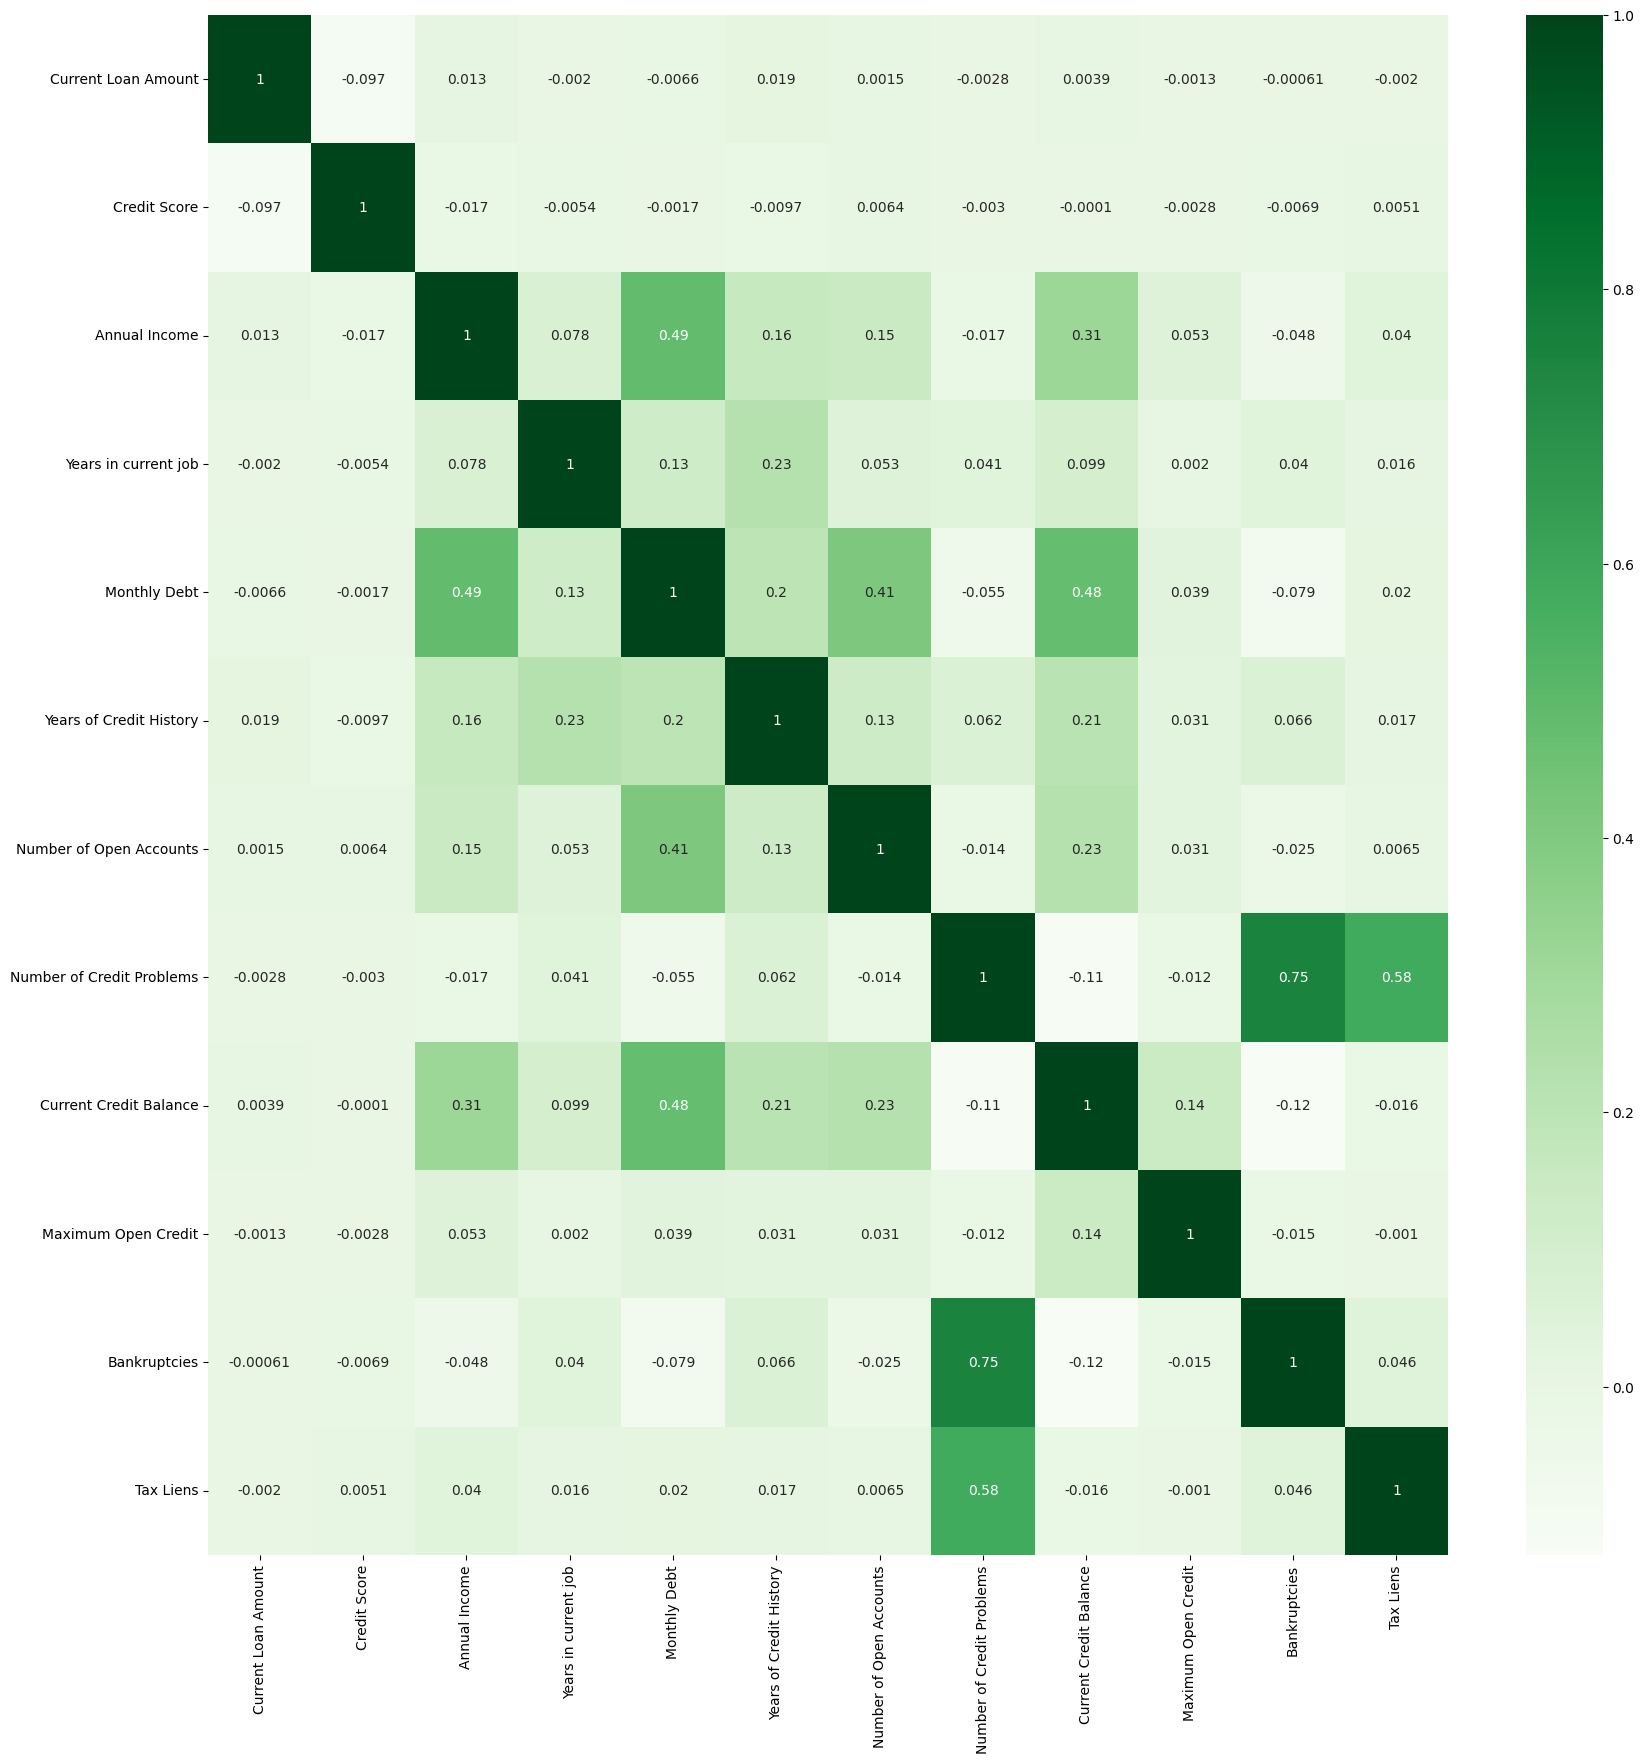

In [75]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(), annot=True, cmap = 'Greens')

### Con esto sacamos los años, y tratamos de rellenar con una Frecuencia Relativa para mantener la relación 

In [76]:
filing=df["Years in current job"].unique()
filing=np.sort(filing)
fill=np.delete(filing,10)
frec_relativa = df["Years in current job"].sort_values().value_counts(normalize=True, sort=False)
frec_relativa = frec_relativa.to_list()
df["Years in current job"].fillna(np.random.choice(fill,p=frec_relativa),inplace=True)

<AxesSubplot:>

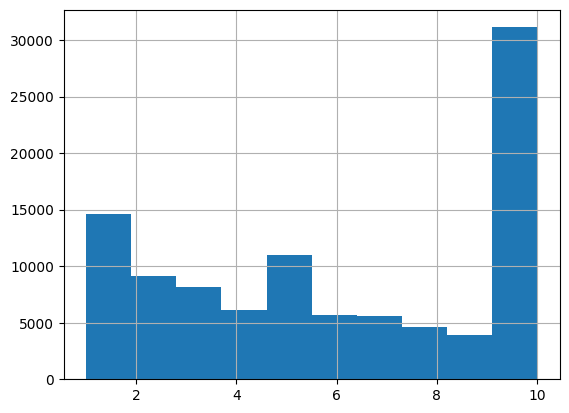

In [77]:
df["Years in current job"].hist()

#### LA FRECUENCIA RELATIVA ES UN METODO PARA RELLENAR MISSINGS SACANDO LAS POSIBILIDADES QUE TENGA EN BASE A LA CANTIDAD DE DATOS QUE SE REPITEN, PARA NO UTILIZAR UNA MEDIA O MEDIANA COMO RANGO, SE RELLENA CON FRECUENCIA 

In [78]:
frec_relativa

[0.1526864206811585,
 0.09536636805947087,
 0.08529098540374616,
 0.0641379022322454,
 0.07086178454342333,
 0.0593664515859592,
 0.05822840318235921,
 0.047839796195368454,
 0.04129340767190796,
 0.3249284804443609]

In [79]:
np.random.choice(fill,p=frec_relativa)

7.0

In [80]:
len(df[df['Years in current job'] == 8])/len(df)

0.04582

In [81]:
#TAX Leins son retenciones de impuestos, estos se rellenan con ceros tranquilamente 
df["Tax Liens"].fillna(0, inplace=True)

In [82]:
#Los ingresos Anuales los rellenamos con la mediana del salario 
df["Annual Income"].fillna(df["Annual Income"].median(), inplace=True)

In [83]:
#El maximo credito abierto puede ser cubierto por el valor mas repetido porque se interpreta como el Estandar
df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].mode()[0] ,inplace = True) 

In [84]:
lo=df['Credit Score'].dropna()
df['Credit Score']=df['Credit Score'].fillna(pd.Series(np.random.choice(lo,size=len(df.index))))

In [85]:
df1 = df[['Bankruptcies','Number of Credit Problems']]

In [86]:
mask = df1[df1['Bankruptcies'].isna()]
mask['Number of Credit Problems'].value_counts()

0.0    196
1.0      8
Name: Number of Credit Problems, dtype: int64

In [87]:
#Como los Valores mayoritariamente son 0 y por su alta correlación entre ambas columnas del df se pueden llenar con 0 
df['Bankruptcies'] = df['Bankruptcies'].fillna(0)

### Los Nan se pueden representar con este valor, por lo que estos prestamos son irreales 

In [88]:
df.drop(df[df['Current Loan Amount']==99999999.0].index, inplace=True)
df.reset_index(drop=True)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,686.0,1174162.0,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
3,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,685.0,1174162.0,5.0,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
4,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10.0,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88511,79b81158-5d55-4766-8ad6-ebcd683f7d59,e45e8dc4-05ad-4efe-92cc-784a6d5ef61a,Fully Paid,44484.0,Short Term,717.0,1152426.0,10.0,Home Mortgage,small_business,6280.64,21.0,6.0,0.0,961932.0,0.0,0.0,0.0
88512,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1.0,Home Mortgage,Other,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
88513,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070.0,Short Term,725.0,475437.0,7.0,Own Home,other,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
88514,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6.0,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88516 entries, 0 to 99998
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan ID                    88516 non-null  object 
 1   Customer ID                88516 non-null  object 
 2   Loan Status                88516 non-null  object 
 3   Current Loan Amount        88516 non-null  float64
 4   Term                       88516 non-null  object 
 5   Credit Score               88516 non-null  float64
 6   Annual Income              88516 non-null  float64
 7   Years in current job       88516 non-null  float64
 8   Home Ownership             88516 non-null  object 
 9   Purpose                    88516 non-null  object 
 10  Monthly Debt               88516 non-null  float64
 11  Years of Credit History    88516 non-null  float64
 12  Number of Open Accounts    88516 non-null  float64
 13  Number of Credit Problems  88516 non-null  flo

In [90]:
#sns.pairplot(df)

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

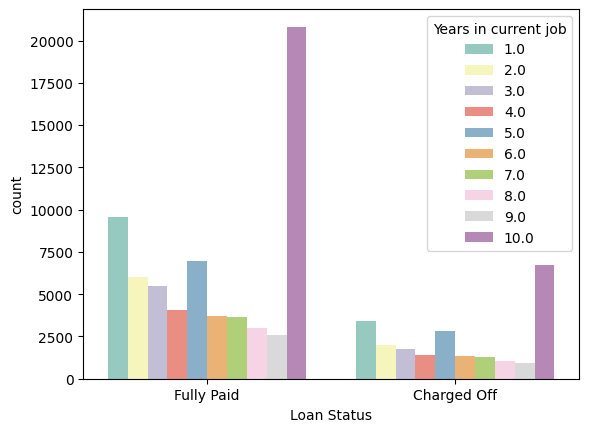

In [91]:
sns.countplot(x="Loan Status", data=df,hue="Years in current job",palette="Set3")

In [92]:
df['Purpose'].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Buy a Car', 'major_purchase', 'Take a Trip', 'Other',
       'Business Loan', 'small_business', 'Medical Bills', 'vacation',
       'Educational Expenses', 'wedding', 'moving', 'renewable_energy'],
      dtype=object)

In [93]:
df['Loan Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [94]:
df['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [95]:
df['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [96]:
df["Home Ownership"].replace("HaveMortgage","Home Mortgage",inplace=True)

In [97]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

In [98]:
df['Credit Score'].max()

7510.0

In [99]:
len(df[df['Credit Score']<=1000])

82935

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88516 entries, 0 to 99998
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan ID                    88516 non-null  object 
 1   Customer ID                88516 non-null  object 
 2   Loan Status                88516 non-null  object 
 3   Current Loan Amount        88516 non-null  float64
 4   Term                       88516 non-null  object 
 5   Credit Score               88516 non-null  float64
 6   Annual Income              88516 non-null  float64
 7   Years in current job       88516 non-null  float64
 8   Home Ownership             88516 non-null  object 
 9   Purpose                    88516 non-null  object 
 10  Monthly Debt               88516 non-null  float64
 11  Years of Credit History    88516 non-null  float64
 12  Number of Open Accounts    88516 non-null  float64
 13  Number of Credit Problems  88516 non-null  flo

**Existe un problema con la columna 'Credit Score' ya que contiene valores superiores a mil, un valor que supera los valores del puntaje crediticio de Estados Unidos**

In [101]:
df[df['Credit Score']>7120]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10.0,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
56,a5ada080-a058-4ad2-8953-002b7ec1ae31,9966e08c-04a6-41ab-86d0-e4062c64bd41,Charged Off,78012.0,Short Term,7380.0,728726.0,4.0,Rent,major_purchase,10135.36,11.4,8.0,0.0,104633.0,199936.0,0.0,0.0
65,1704367e-1d71-4551-8d33-49aa15cab4b1,88f97adf-070a-47b1-9657-38276eef7d19,Charged Off,523908.0,Long Term,7370.0,1028774.0,6.0,Home Mortgage,Debt Consolidation,22632.99,19.3,5.0,0.0,474658.0,742720.0,0.0,0.0
90,374bba0a-c0fe-46bf-a93f-b7aa70333d92,64f770d8-dec2-42e7-8955-6149ce7efd5f,Fully Paid,479358.0,Short Term,7320.0,1174162.0,10.0,Rent,Debt Consolidation,22659.59,22.4,13.0,0.0,807462.0,1391302.0,0.0,0.0
117,a7e3baae-3dd8-46f4-a34c-c3e3971cdba3,3ecdcd82-6b30-4518-bdf9-92de5833caee,Charged Off,86174.0,Short Term,7210.0,837311.0,1.0,Home Mortgage,Debt Consolidation,10884.91,13.6,15.0,0.0,360867.0,671770.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99576,0c9e69ef-16a5-4b30-9682-ab44fbe49933,59f2a719-fa34-476f-9a30-1c26d56dbd82,Fully Paid,331958.0,Short Term,7410.0,1174162.0,10.0,Home Mortgage,Debt Consolidation,28986.78,15.6,14.0,0.0,272916.0,384912.0,0.0,0.0
99728,dda52ed7-c6f5-47b5-b6a2-a5fa49038211,cd183c81-2975-4da5-97bc-0a22e90ab233,Charged Off,311916.0,Short Term,7250.0,1211782.0,1.0,Rent,Debt Consolidation,27669.13,15.2,13.0,0.0,184471.0,356004.0,0.0,0.0
99777,9eb62994-fb03-4a92-968d-f69bdcd66376,d5f32ea8-5650-4755-b693-acbf6a41e992,Charged Off,67122.0,Short Term,7130.0,579690.0,10.0,Home Mortgage,Debt Consolidation,11400.57,14.7,6.0,0.0,65740.0,120824.0,0.0,0.0
99818,ac339f4b-168f-414c-a0f3-785e758b1e2b,f9261ef6-e224-4566-9b37-a9e15be90251,Charged Off,118030.0,Short Term,7320.0,428222.0,5.0,Own Home,Debt Consolidation,9706.15,30.4,9.0,0.0,218120.0,517506.0,0.0,0.0


In [102]:
df.drop(index=df[df['Credit Score']>1000].index, inplace=True)


In [103]:
df['Credit Score'].value_counts()

747.0    1855
741.0    1772
746.0    1766
740.0    1742
725.0    1734
         ... 
586.0       9
593.0       8
590.0       7
589.0       7
592.0       5
Name: Credit Score, Length: 167, dtype: int64

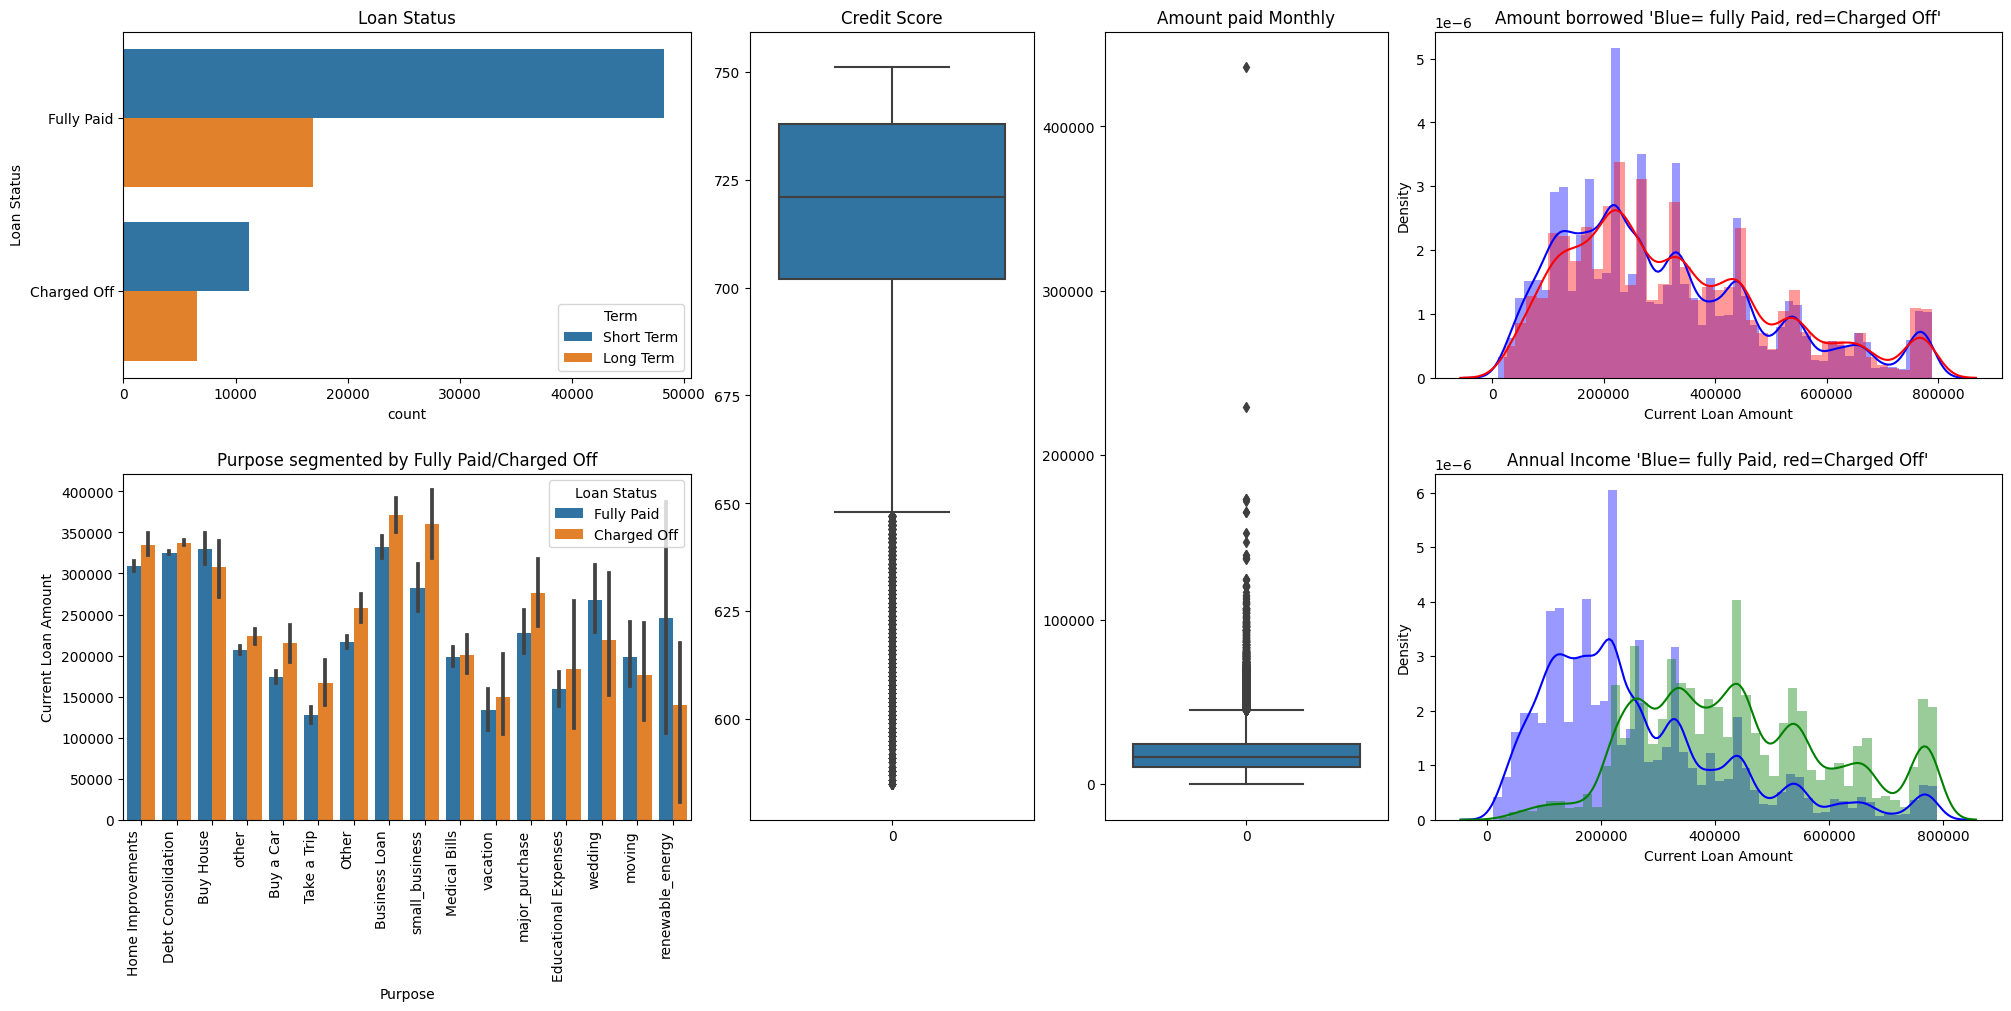

In [104]:
fig = plt.figure(constrained_layout=True, figsize=(20,10))
grid = gridspec.GridSpec(ncols=6, nrows=2, figure=fig)

#bar plot Horizontal
ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Loan Status')
sns.countplot(y='Loan Status',hue ='Term',data=df, ax=ax1,) #Paid no paid

#bar plot Vertical
ax2 = fig.add_subplot(grid[1, :2])
ax2.set_title('Purpose segmented by Fully Paid/Charged Off')
bar = sns.barplot(x='Purpose', y='Current Loan Amount', hue = 'Loan Status',data=df, ax = ax2)
bar.set_xticklabels(bar.get_xticklabels(),  rotation=90, horizontalalignment='right') #fixing the Names

#box plot Credit Score
ax3 = fig.add_subplot(grid[:, 2])
ax3.set_title('Credit Score')
sns.boxplot(df.loc[:,'Credit Score'], orient='v', ax = ax3)


#box plot Monthly payment
ax4 = fig.add_subplot(grid[:,3])
ax4.set_title("Amount paid Monthly")
sns.boxplot(df['Monthly Debt'], orient='v' ,ax=ax4)

#Displot Distribution
ax5 = fig.add_subplot(grid[0, 4:6])
ax5.set_title("Amount borrowed 'Blue= fully Paid, red=Charged Off'")
#---> Segmenting fully Paid /Charge Off
full_paid = df[df['Loan Status']=="Fully Paid"]
charged_off = df[df['Loan Status']=="Charged Off"]
sns.distplot(full_paid['Current Loan Amount'], color = 'Blue' , rug=False, ax=ax5) 
sns.distplot(charged_off['Current Loan Amount'], color = 'Red',rug=False, ax=ax5) 

#Displot Distribution
ax6 = fig.add_subplot(grid[1, 4:6])
ax6.set_title("Annual Income 'Blue= fully Paid, red=Charged Off'")
#---> Segmenting fully Paid /Charge Off
short = df[df['Term']=='Short Term']
long = df[df['Term']=='Long Term']
sns.distplot(short['Current Loan Amount'], color = 'Blue' , ax=ax6) 
sns.distplot(long['Current Loan Amount'], color = 'Green', ax=ax6)

plt.show()

## Se Simplifican los valores del score crediticio para que la maquina pueda interpretar mejor los Score bajando la escala de 0 a 10

In [105]:
df['Credit Score'].value_counts()
df['Credit Score'][df['Credit Score'] >= 740] = 7.5
df['Credit Score'][df['Credit Score'] >= 700] = 7.0
df['Credit Score'][df['Credit Score'] >= 645] = 6.5
df['Credit Score'][df['Credit Score'] >= 595] = 6.0
df['Credit Score'][df['Credit Score'] >= 500] = 5.5

In [106]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,7.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,6.5,1174162.0,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,7.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,6.5,1174162.0,5.0,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,7.0,1184194.0,1.0,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,79b81158-5d55-4766-8ad6-ebcd683f7d59,e45e8dc4-05ad-4efe-92cc-784a6d5ef61a,Fully Paid,44484.0,Short Term,7.0,1152426.0,10.0,Home Mortgage,small_business,6280.64,21.0,6.0,0.0,961932.0,0.0,0.0,0.0
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,7.0,783389.0,1.0,Home Mortgage,Other,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070.0,Short Term,7.0,475437.0,7.0,Own Home,other,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,7.5,1150545.0,6.0,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


**Se eliminan valores como el ID tanto del cliente como del prestamo porque es información del cliente que no debe influir en el modelo**

In [107]:
df.drop(['Loan ID', 'Customer ID'], axis=1, inplace=True)

In [108]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,82935.000000,82935.000000,8.293500e+04,82935.000000,82935.000000,82935.000000,82935.000000,82935.000000,8.293500e+04,8.293500e+04,82935.000000,82935.000000
mean,311414.193622,6.980310,1.333506e+06,5.943498,18513.721118,18.166520,11.120998,0.168650,2.944258e+05,7.729957e+05,0.117731,0.029119
std,186133.611175,0.365049,8.100547e+05,3.432086,12189.104010,6.998157,5.000252,0.483181,3.629745e+05,9.172973e+06,0.351428,0.258426
min,10802.000000,5.500000,7.662700e+04,1.000000,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,171908.000000,7.000000,9.416400e+05,3.000000,10243.375000,13.400000,8.000000,0.000000,1.122520e+05,2.717110e+05,0.000000,0.000000
50%,266772.000000,7.000000,1.174162e+06,6.000000,16268.560000,16.900000,10.000000,0.000000,2.095890e+05,4.655420e+05,0.000000,0.000000
75%,432212.000000,7.000000,1.494920e+06,10.000000,24070.340000,21.600000,14.000000,0.000000,3.679065e+05,7.804500e+05,0.000000,0.000000
max,789250.000000,7.500000,3.647544e+07,10.000000,435843.280000,70.500000,76.000000,15.000000,1.298696e+07,1.539738e+09,7.000000,15.000000


In [109]:
# !pip install imblearn
'''
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(df.drop(['Loan Status'], axis= 1), df['Loan Status'])
'''



"\nfrom imblearn.under_sampling import RandomUnderSampler\nfrom imblearn.over_sampling import RandomOverSampler\n\nrus = RandomUnderSampler(random_state=42)\nX_rus, y_rus = rus.fit_resample(df.drop(['Loan Status'], axis= 1), df['Loan Status'])\n"

**El Target al ser una clasificación binaria se transforma a 0 y 1, Los 0 son los prestamos ya pagados, los 1 los prestamos que aun no se pagan**

In [162]:
df['Loan Status'][df['Loan Status'] == 'Fully Paid'] = 0 
df['Loan Status'][df['Loan Status'] == 'Charged Off'] = 1 
df['Loan Status']= df['Loan Status'].astype(int)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82935 entries, 0 to 99998
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                82935 non-null  int64  
 1   Current Loan Amount        82935 non-null  float64
 2   Term                       82935 non-null  object 
 3   Credit Score               82935 non-null  float64
 4   Annual Income              82935 non-null  float64
 5   Years in current job       82935 non-null  float64
 6   Home Ownership             82935 non-null  object 
 7   Purpose                    82935 non-null  object 
 8   Monthly Debt               82935 non-null  float64
 9   Years of Credit History    82935 non-null  float64
 10  Number of Open Accounts    82935 non-null  float64
 11  Number of Credit Problems  82935 non-null  float64
 12  Current Credit Balance     82935 non-null  float64
 13  Maximum Open Credit        82935 non-null  flo

In [164]:
from sklearn.model_selection import train_test_split
y = df['Loan Status'].copy()
X = df.drop(['Loan Status'], axis= 1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=0.30, random_state=42)
                            

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

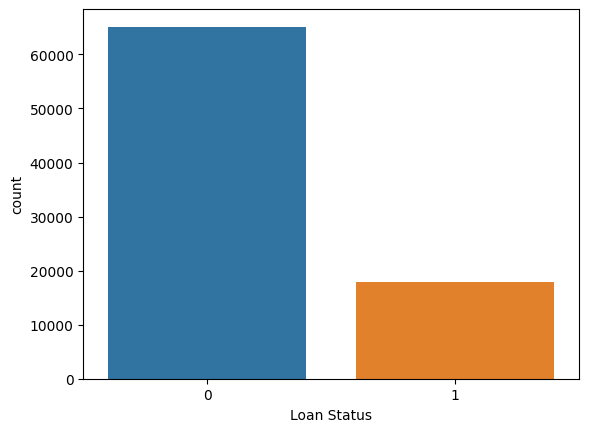

In [165]:
sns.countplot(df, x= df['Loan Status'])

In [166]:
from sklearn.model_selection import train_test_split
y = df['Loan Status'].copy()
X = df.drop(['Loan Status'], axis= 1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=0.30, random_state=42)

In [167]:


from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X_train['Purpose'] = lb.fit_transform(X_train['Purpose'])
X_test['Purpose'] = lb.transform(X_test['Purpose'])
X_train['Term'] = lb.fit_transform(X_train['Term'])
X_test['Term'] = lb.transform(X_test['Term'])
X_train["Home Ownership"] = lb.fit_transform(X_train['Home Ownership'])
X_test["Home Ownership"] = lb.transform(X_test['Home Ownership'])



In [139]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58054 entries, 12376 to 19035
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Current Loan Amount        58054 non-null  float64
 1   Term                       58054 non-null  int64  
 2   Credit Score               58054 non-null  float64
 3   Annual Income              58054 non-null  float64
 4   Years in current job       58054 non-null  float64
 5   Home Ownership             58054 non-null  int64  
 6   Purpose                    58054 non-null  int64  
 7   Monthly Debt               58054 non-null  float64
 8   Years of Credit History    58054 non-null  float64
 9   Number of Open Accounts    58054 non-null  float64
 10  Number of Credit Problems  58054 non-null  float64
 11  Current Credit Balance     58054 non-null  float64
 12  Maximum Open Credit        58054 non-null  float64
 13  Bankruptcies               58054 non-null 

In [168]:

from sklearn.ensemble import RandomForestClassifier

import numpy as np
names = X_train
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

scores = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)
clasif= pd.DataFrame(scores, columns=['Score', 'Feature'])


<AxesSubplot:xlabel='Score', ylabel='Feature'>

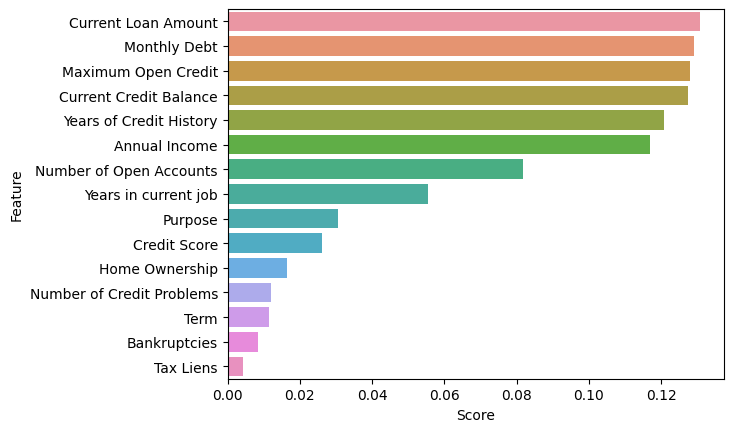

In [169]:
sns.barplot(data = clasif, x= 'Score', y='Feature')

## ELIMINAMOS LAS COLUMNAS QUE MENOS LE IMPORTAN AL MODELO Y NOS QUEDAMOS HASTA EL SCORE CREDITICIO 

In [173]:
X_train = X_train.drop(['Tax Liens','Bankruptcies','Term', 'Number of Credit Problems','Home Ownership'], axis= 1)
X_train

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit
12376,618992.0,6.5,1375809.0,10.0,3,28089.41,18.7,18.0,436069.0,642400.0
89144,179564.0,7.5,1512077.0,6.0,3,25226.68,17.7,10.0,767923.0,1107304.0
96673,769384.0,7.0,1174162.0,10.0,5,69413.27,22.8,13.0,2240594.0,9167356.0
70830,171820.0,7.5,1174162.0,10.0,3,4138.77,17.6,6.0,99788.0,146278.0
56944,56210.0,7.0,1164966.0,10.0,3,28347.43,11.2,15.0,293569.0,607002.0
...,...,...,...,...,...,...,...,...,...,...
7571,176660.0,6.0,1220617.0,6.0,11,8941.02,13.0,5.0,19646.0,127798.0
66155,345422.0,7.5,3452300.0,2.0,3,25345.62,25.2,13.0,1129987.0,2659382.0
92650,120934.0,7.5,6963120.0,4.0,9,88779.78,19.3,37.0,178106.0,667370.0
1041,367796.0,7.0,1172566.0,5.0,3,34101.96,11.5,12.0,338352.0,590018.0


## MODELOS DE MACHINE LEARNING APLICADOS

**UTILIZAMOS REGRESIÓN LOGISTICA, ARBOL DE DECISIÓN, RANDOM FOREST, XGBOOST, SVM, REDES NEURONALES**

In [174]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler


# Creo el scaler con los datos de train
scal = StandardScaler() # Declaro el scaler
scal.fit(X_train) # Lo "entreno". Calculo su media y std para cada feature
X_train = scal.transform(X_train) # Aplico el scaler y sobreescribo los datos de train
lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_train)
print("Score del modelo (R^2):", round(lr.score(X_train, y_train), 4))
print("R^2 score:", round(r2_score(preds, y_train), 4))
print("MAE score:", round(mean_absolute_error(preds, y_train), 4))
print("MSE score:", round(mean_squared_error(preds, y_train), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(preds, y_train)), 4))

print("Score del modelo (accuracy):", round(lr.score(X_train, y_train), 3))
print("Accuracy score:", round(accuracy_score(preds, y_train), 3))
print("Recall score:", round(recall_score(preds, y_train), 3))
print("Precision score:", round(precision_score(preds, y_train), 3))
print("F1 score:", round(f1_score(preds, y_train), 3))
print("AUC:", round(roc_auc_score(preds, y_train), 3))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(preds, y_train), 4))

Score del modelo (R^2): 0.7849
R^2 score: -12489.2151
MAE score: 0.2151
MSE score: 0.2151
RMSE score: 0.4638
Score del modelo (accuracy): 0.785
Accuracy score: 0.785
Recall score: 0.0
Precision score: 0.0
F1 score: 0.0
AUC: 0.392
MAPE score: nan


In [209]:
from sklearn import metrics

# En este diccionario iremos almacenando los scores de cada modelo
performance = {}

# Función para obtener el ROC AUC Score de un modelo
def roc_auc(modelo):
    '''Recibe un modelo, lo entrena con datos de entrenamiento, 
    realiza predicciones con datos de validación y devuelve el 
    ROC AUC Score y una gráfica con la curva ROC.
    '''
    # Entrenamos el modelo con datos de entrenamiento
    modelo.fit(X_train, y_train)
    # Predicciones con datos de validación
    preds = modelo.predict_proba(X_test)
    # Gráfico de la curva ROC
    fpr, tpr, thresholds = metrics.roc_curve(y_test, preds[:, 1])
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                    estimator_name='example estimator')
    display.plot()
    plt.show()
    # ROC AUC Score de las predicciones
    print(f'ROC AUC Score {modelo.__class__.__name__} :', metrics.roc_auc_score(y_test, preds[:, 1]))
    # Agregamos el Score al diccionario
    performance[modelo.__class__.__name__] = metrics.roc_auc_score(y_test, preds[:, 1])

In [210]:
from sklearn.model_selection import train_test_split
y = df['Loan Status'].copy()
X = df.drop(['Loan Status'], axis= 1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=0.30, random_state=42)
                            
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X_train['Purpose'] = lb.fit_transform(X_train['Purpose'])
X_test['Purpose'] = lb.transform(X_test['Purpose'])
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)
X_train['Term'] = lb.fit_transform(X_train['Term'])
X_test['Term'] = lb.transform(X_test['Term'])
X_train["Home Ownership"] = lb.fit_transform(X_train['Home Ownership'])
X_test["Home Ownership"] = lb.transform(X_test['Home Ownership'])                           

In [177]:
X_train = X_train.drop(['Tax Liens','Bankruptcies','Term', 'Number of Credit Problems','Home Ownership'], axis= 1)

In [180]:
X_test = X_test.drop(['Tax Liens','Bankruptcies','Term', 'Number of Credit Problems','Home Ownership'], axis=1)

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=17)

tree_clf.fit(X_train, y_train)
predictions = tree_clf.predict(X_test)
accuracy_score(y_test,predictions)

0.7858205056066878

In [182]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state = 42)

parameters = {"max_depth" : [2,3,4,5,6,7],
                "min_samples_leaf" : np.arange(1,7)}

grid_tree = GridSearchCV(tree,parameters, scoring = "accuracy",cv = 10)

grid_tree.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6])},
             scoring='accuracy')

In [184]:
predictions = grid_tree.predict(X_test)
accuracy_score(y_test,predictions)


0.7859008882279651

In [203]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


rand_forest = RandomForestClassifier()
svm = Pipeline([("scaler",MinMaxScaler()),
                ("selectkbest",SelectKBest()),
                ("svm",SVC())
               ])
reg_log = Pipeline([("imputer",SimpleImputer()),
                    ("scaler",MinMaxScaler()),
                    ("reglog",LogisticRegression())
                   ])
'''
Para iterar hiperparámetros de varios elementos del pipeline, le ponemos un nombre
a cada elemento en el pipeline, por ejemplo 'selectkbest' y 'svm', para luego en el
grid de hiperparametros identificar sus respectivos parametros mediante el nombre
que le hayamos puesto en el pipeline, dos guiones bajos y el nombre del hiperparámetro.
'''
grid_random_forest = {"n_estimators": [120],
                     "max_depth": [3,4,5,6,10],
                     "max_features": ["sqrt", 3, 4]
                     }
reg_log_param = {
                 "imputer__strategy": ['mean', 'median', 'most_frequent'],
                 "reglog__penalty": ["l1","l2"],
                 "reglog__C": np.logspace(0, 4, 10)
                }

# Fit the Random Forest model
rand_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rand_forest.predict(X_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

print("Random Forest:")
print("Accuracy: ", accuracy_rf)
print("Precision: ", precision_rf)
print("Recall: ", recall_rf)
print("F1-score: ", f1_score_rf)

# Fit the SVM model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm)

print("SVM:")
print("Accuracy: ", accuracy_svm)
print("Precision: ", precision_svm)
print("Recall: ", recall_svm)
print("F1-score: ", f1_score_svm)

# Fit the Logistic Regression model
reg_log.fit(X_train, y_train)

# Make predictions on the test set
y_pred_reglog = reg_log.predict(X_test)

# Evaluate the model's performance
accuracy_reglog = accuracy_score(y_test, y_pred_reglog)
precision_reglog = precision_score(y_test, y_pred_reglog)
recall_reglog = recall_score(y_test, y_pred_reglog)
f1_score_reglog = f1_score(y_test, y_pred_reglog)

print("Logistic Regression:")
print("Accuracy: ", accuracy_reglog)
print("Precision: ", precision_reglog)
print("Recall: ", recall_reglog)
print("F1-score: ", f1_score_reglog)

Random Forest:
Accuracy:  0.7854185925003014
Precision:  0.4770992366412214
Recall:  0.023465365121081282
F1-score:  0.04473072105922347
SVM:
Accuracy:  0.7859008882279651
Precision:  0.0
Recall:  0.0
F1-score:  0.0
Logistic Regression:
Accuracy:  0.7859008882279651
Precision:  0.0
Recall:  0.0
F1-score:  0.0


In [207]:

# Almaceno en una lista de tuplas los modelos (nombre que le pongo, el modelo, hiperparametros)
models = [('rand_forest', rand_forest, grid_random_forest),
         ('reg_log', reg_log, reg_log_param)]

# Declaro en un diccionario los pipelines e hiperparametros
models_gridsearch = {}

for i in models:
    models_gridsearch[i[0]] = GridSearchCV(i[1],
                                          i[2],
                                          scoring="accuracy",
                                          cv= 2,
                                          verbose=1,
                                          n_jobs=-1)
    
    models_gridsearch[i[0]].fit(X_train, y_train)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
Fitting 2 folds for each of 60 candidates, totalling 120 fits


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

In [193]:
best_grids = [(i, j.best_score_) for i, j in models_gridsearch.items()]

best_grids = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)
best_grids

,Grid,Best score
0,rand_forest,0.784890
1,reg_log,0.784873


# Otros Modelos de Clasificación 

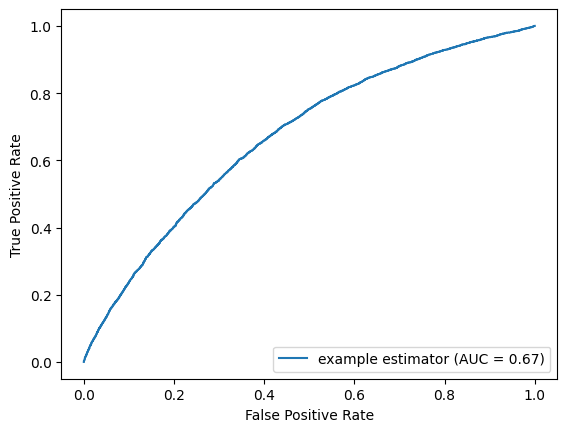

ROC AUC Score XGBClassifier : 0.672038706442575


In [216]:
from xgboost import XGBClassifier
from sklearn import metrics

# Modelo 1 - XGBClassifier
xgb_classifier = XGBClassifier(
    max_depth=1000, 
    learning_rate=0.08)

# ROC Curve y ROC AUC Score
roc_auc(xgb_classifier)

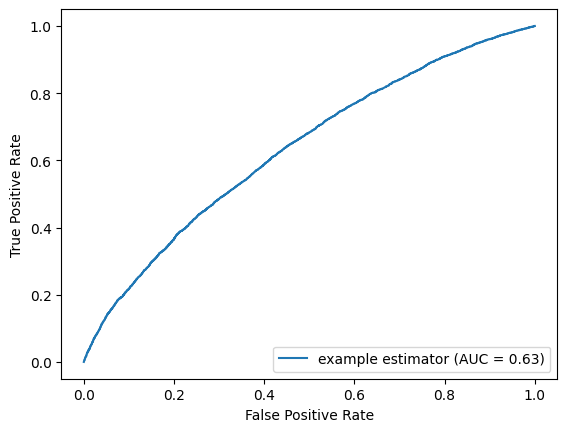

ROC AUC Score XGBRFClassifier : 0.6348407385964758


In [212]:
from xgboost import XGBRFClassifier

# Modelo 2 - XGBRFClassifier
xgb_rf_classifier = XGBRFClassifier(
    objective='binary:logistic', 
    learning_rate=0.02,
    max_depth=10,
    n_estimators=200)

# ROC Curve y ROC AUC Score
roc_auc(xgb_rf_classifier)

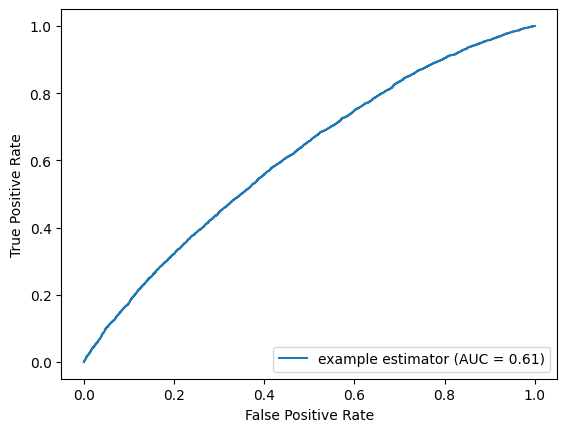

ROC AUC Score AdaBoostClassifier : 0.6119749895160675


In [196]:
from sklearn.ensemble import AdaBoostClassifier

# Modelo 3 - AdaBoostClassifier
ada = AdaBoostClassifier(
    n_estimators=400, 
    learning_rate=0.1)

# ROC Curve y ROC AUC Score
roc_auc(ada)

**RED NEURONAL**

Epoch 1/2000
114/114 [==============================] - 18s 114ms/step - loss: 0.6326 - auc_4: 0.5301 - val_loss: 0.5184 - val_auc_4: 0.5642
Epoch 2/2000
114/114 [==============================] - 12s 107ms/step - loss: 0.5466 - auc_4: 0.5535 - val_loss: 0.5170 - val_auc_4: 0.5801
Epoch 3/2000
114/114 [==============================] - 12s 105ms/step - loss: 0.5344 - auc_4: 0.5642 - val_loss: 0.5175 - val_auc_4: 0.5656
Epoch 4/2000
114/114 [==============================] - 12s 105ms/step - loss: 0.5272 - auc_4: 0.5702 - val_loss: 0.5132 - val_auc_4: 0.5862
Epoch 5/2000
114/114 [==============================] - 12s 107ms/step - loss: 0.5199 - auc_4: 0.5799 - val_loss: 0.5113 - val_auc_4: 0.5910
Epoch 6/2000
114/114 [==============================] - 12s 102ms/step - loss: 0.5183 - auc_4: 0.5825 - val_loss: 0.5137 - val_auc_4: 0.5927
Epoch 7/2000
114/114 [==============================] - 12s 105ms/step - loss: 0.5155 - auc_4: 0.5883 - val_loss: 0.5108 - val_auc_4: 0.5940
Epoch 8/2000


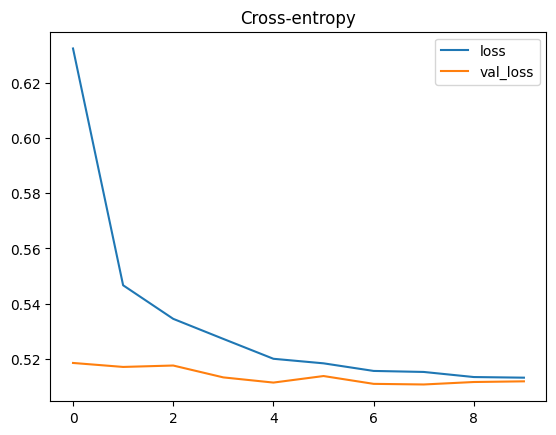

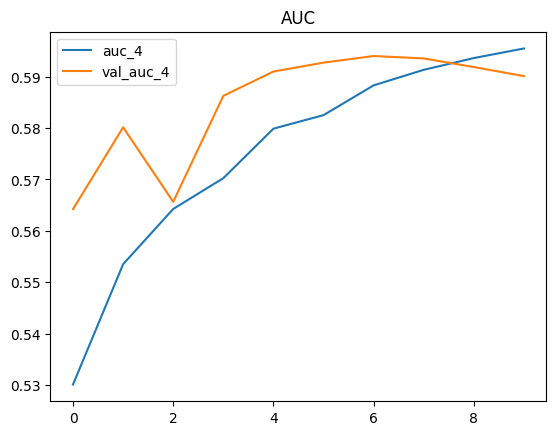

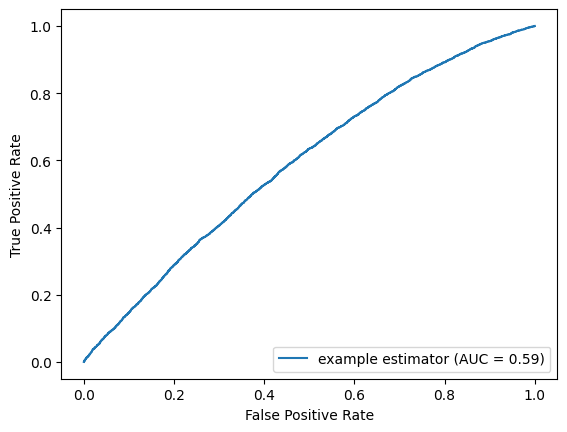

In [202]:
from tensorflow import keras
from tensorflow.keras import layers
input_shape = [X_train.shape[1]]
# Red Neuronal
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='elu'), 
    layers.BatchNormalization(),
    layers.Dropout(0.4), 
    layers.Dense(512, activation='elu'), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='elu'), 
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Optimizador, Función de Pérdida y Métrica
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=[keras.metrics.AUC()]
)

# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

# Entrenando la Red
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=2000,
    callbacks=[early_stopping],
)

# Resultados
history_df = pd.DataFrame(history.history)
history_df.iloc[:, [0, 2]].plot(title="Cross-entropy")
history_df.iloc[:, [1, 3]].plot(title="AUC")

preds = model.predict(X_test)

performance['Red Neuronal'] = metrics.roc_auc_score(y_test, preds.ravel())

# Mostrando la ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

plt.show()

In [230]:
best_grids
metricas={"Decission Tree": 0.78582, "Random Forest": 0.78541 , "Logistic Regression": 0.785, 'SVM':0.78590,'XGBC':0.67203,'XGBRFC': 0.634840,'ADABOOST':0.61197, 'RED NEURONAL':0.59}

In [231]:
metricas = pd.DataFrame(list(metricas.items()),columns = ['Model','Accuracy'])
metricas

,Model,Accuracy
0,Decission Tree,0.78582
1,Random Forest,0.78541
2,Logistic Regression,0.78500
3,SVM,0.78590
4,XGBC,0.67203
5,XGBRFC,0.63484
6,ADABOOST,0.61197
7,RED NEURONAL,0.59000


In [232]:
metricas = pd.concat([metricas, best_grids], axis=0)

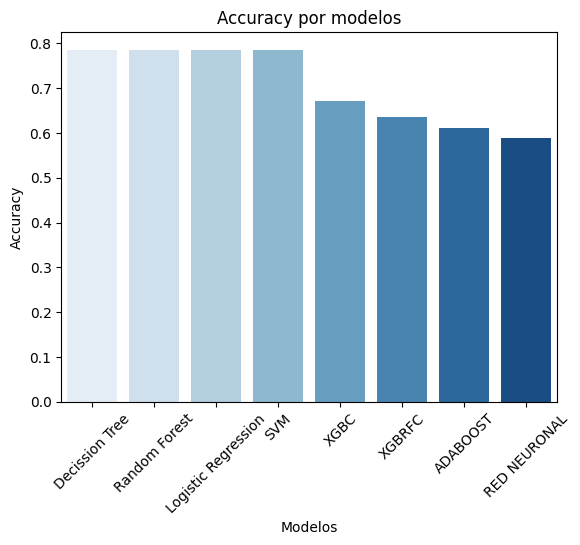

In [236]:
# Crear el gráfico de barras
sns.barplot(data=metricas, x='Model', y='Accuracy',palette='Blues')
plt.xticks(rotation=45)
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Accuracy por modelos')



plt.show()

In [ ]:
# Guardar el modelo
import pickle

with open('finished_model.model', "wb") as archivo_salida:
    pickle.dump(models_gridsearch['reg_log'].best_estimator_, archivo_salida)

In [ ]:
# Para volver a leer el modelo
with open('finished_model.model', "rb") as archivo_entrada:
    pipeline_importada = pickle.load(archivo_entrada)
    
print(pipeline_importada)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('reglog', LogisticRegression(C=7.742636826811269))])
